In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h_average(s,t,z=.025):                  # averaging kernel     
    return np.double(np.abs(s-t)<=z)/(2*z)

def h_hat(s,t,z=.025):                      # hat function kernel     
    return np.maximum(0,1-np.abs(s-t)/z)/z

def h_gaussian(s,t,z=.025):                 # Gaussian kernel     
    c = 1/(np.sqrt(np.pi)*z)
    return c*np.exp(-np.power(s-t,2)/(z**2))
                  
def build_blur_A_gaussian(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_gaussian(s[j],t,z)/n
    return A

def build_blur_A_hat(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_hat(s[j],t,z)/n
    return A

def build_blur_A_average(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_average(s[j],t,z)/n
    return A

Define the Coke barcode function

In [138]:
def coke_upc():
    
# encode the UPC code for a can of Coke

    code = np.array([0, 1, 1, 1,
                     3, 2, 1, 1,
                     1, 1, 3, 2,
                     3, 1, 1, 2, 
                     3, 2, 1, 1, 
                     3, 2, 1, 1, 
                     3, 2, 1, 1, 
                     1, 1, 1, 1, 1,
                     3, 2, 1, 1, 
                     2, 1, 2, 2, 
                     1, 3, 1, 2, 
                     1, 1, 1, 4, 
                     1, 3, 1, 2, 
                     3, 1, 1, 2,
                     1, 1, 1])
    code = np.cumsum(code)/np.sum(code)
    
# set up the blurring matrix (dimension 500)   
    n = 570
    z = 0.01
    A = build_blur_A_gaussian(n,z)

# set up the true (unblurred) barcode function
    t = np.array([(k-.5)/n for k in range(1,n+1)])
    ftrue = np.zeros(t.shape)
    for k in range(0,t.size):
        if t[k]<1.0:
            ftrue[k] = np.mod(np.min(np.argwhere(t[k] < code)),2)

# compute the exact blurred barcode

    b = A@ftrue
    
# add a bit of noise to the blurred barcode

    bnoise = b + np.linalg.norm(b)*1e-3*np.random.randn(n)
    
    return A, b, bnoise, ftrue


In [139]:
def coke_widths():
    widths = [1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 4, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1];
    return widths

In [140]:
A, b, bnoise, ftrue = coke_upc()

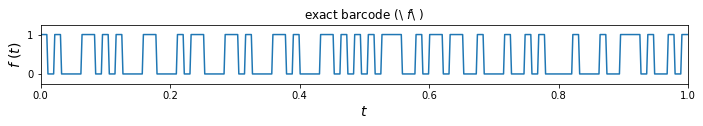

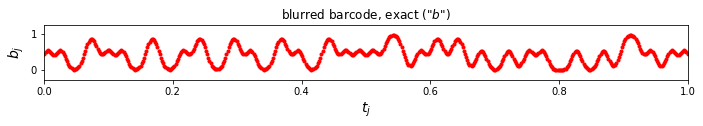

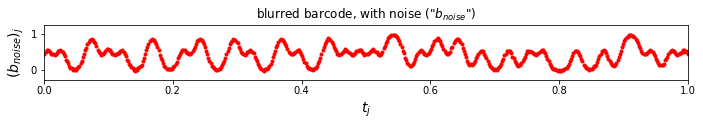

In [141]:
n = 570
t = np.array([(k-.5)/n for k in range(1,n+1)])

plt.figure(figsize=(10,1.85))
plt.plot(t,ftrue)
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('exact barcode (\ $f$\ )')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$f\ (t)$',fontsize=14)
plt.tight_layout()
#plt.savefig('barcode_ftrue.pdf')

plt.figure(figsize=(10,1.85))
plt.plot(t,b,'r.')
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('blurred barcode, exact ("$b$")')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$b_j$',fontsize=14)
plt.tight_layout()
#plt.savefig('barcode_b.pdf')


plt.figure(figsize=(10,1.85))
plt.plot(t,bnoise,'r.')
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('blurred barcode, with noise ("$b_{noise}$")')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$(b_{noise})_j$',fontsize=14)
plt.tight_layout()
#plt.savefig('barcode_bnoise.pdf')


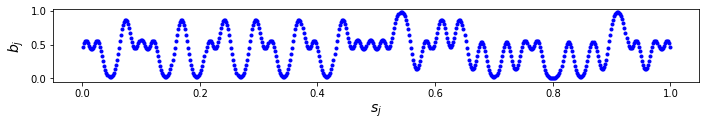

In [142]:
plt.figure(figsize=(10,1.85))
plt.plot(t,b,'b.')
plt.xlabel('$s_j$',fontsize=14)
plt.ylabel('$b_j$',fontsize=14)
plt.tight_layout()


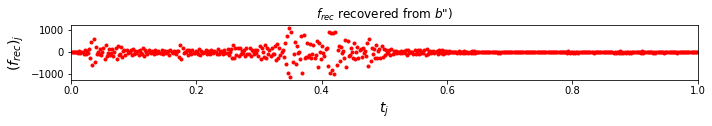

In [143]:
frec_b = np.linalg.solve(A,b)
plt.figure(figsize=(10,1.85))
plt.plot(t,frec_b,'r.')
plt.xlim((0,1))
#plt.ylim((-.25,1.25));
plt.title('$f_{rec}$ recovered from $b$")')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$(f_{rec})_j$',fontsize=14)
plt.tight_layout()

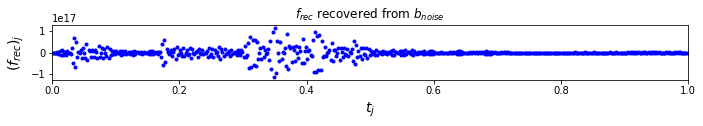

In [144]:
frec_bn = np.linalg.solve(A,bnoise)
plt.figure(figsize=(10,1.85))
plt.plot(t,frec_bn,'b.')
plt.xlim((0,1))
#plt.ylim((-.25,1.25));
plt.title('$f_{rec}$ recovered from $b_{noise}$')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$(f_{rec})_j$',fontsize=14)
plt.tight_layout()

Text(0, 0.5, '$||f_\\lambda||$')

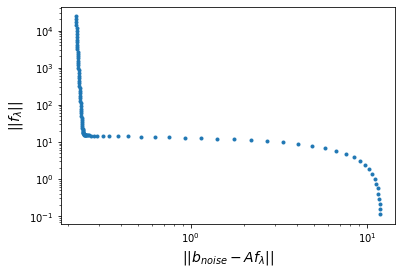

In [145]:
A, b, bnoise, ftrue = coke_upc()

lamvec = np.logspace(-6,1,100);                  # 100 (log-spaced) lambda values
fnorm = [];
rnorm = [];

I    = np.identity(n)
blam = np.block([bnoise,np.zeros(n)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    fnorm.append(np.linalg.norm(flam))
    rnorm.append(np.linalg.norm(bnoise-A@flam))

plt.loglog(rnorm,fnorm,'.')
#plt.xlim([1e-6, 1e2])
#plt.ylim([3, 1e2])
plt.xlabel('$||b_{noise}-A f_\lambda||$',fontsize=14)
plt.ylabel('$||f_\lambda||$',fontsize=14)

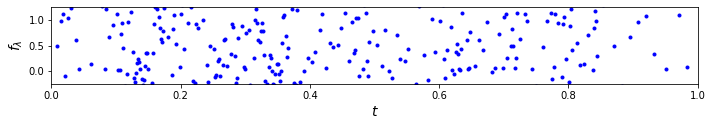

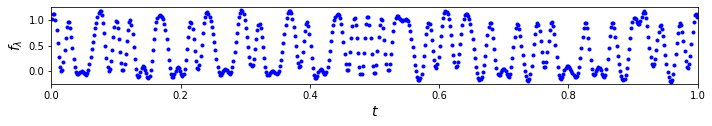

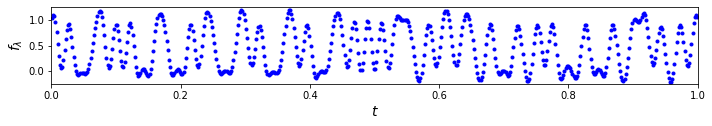

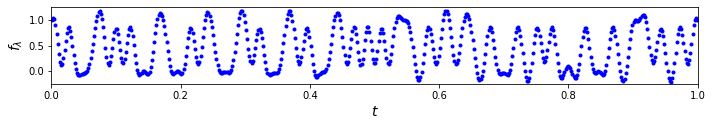

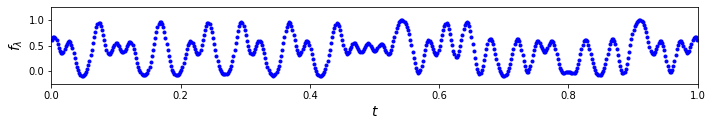

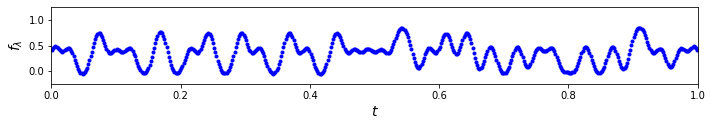

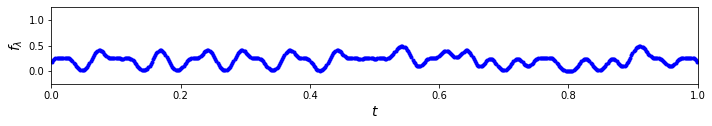

In [148]:
A, b, bnoise, ftrue = coke_upc()

lamvec = np.array([1e-3,5e-2, 7e-2, 1e-1,3e-1,5e-1,1e0])   

I    = np.identity(n)
blam = np.block([bnoise,np.zeros(n)])

t = np.array([(k-.5)/n for k in range(1,n+1)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    tau = .5*(np.max(flam)+np.min(flam));
    #print(np.where(flam>tau,1,0))
    plt.figure(figsize=(10,1.85))
    plt.plot(t,flam,'b.')
    plt.xlim((0,1))
    plt.ylim((-.25,1.25));
    plt.xlabel('$t$',fontsize=14)
    plt.ylabel('$f_\lambda$',fontsize=14)
    plt.tight_layout()

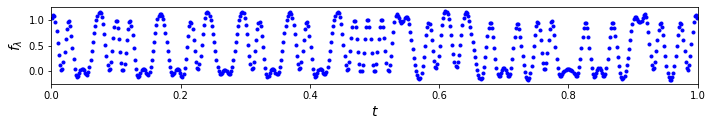

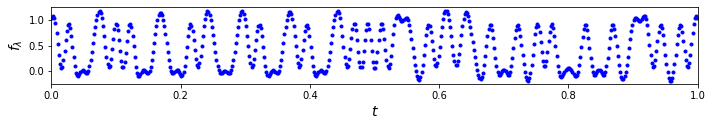

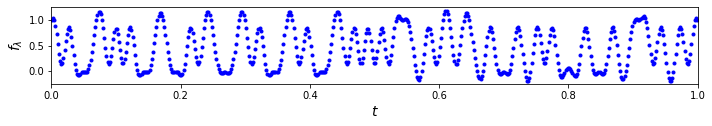

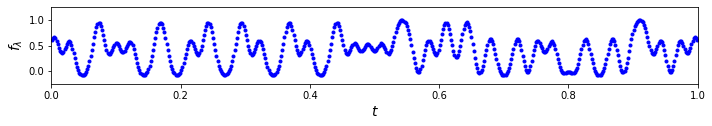

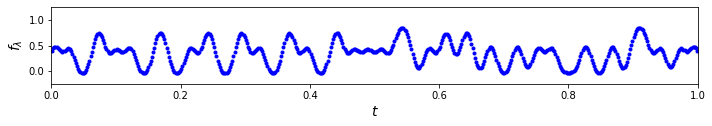

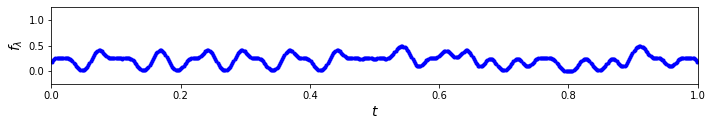

In [149]:
A, b, bnoise, ftrue = coke_upc()

lamvec = np.array([ 5e-2, 7e-2, 1e-1,3e-1,5e-1,1e0])   

I    = np.identity(n)
blam = np.block([b,np.zeros(n)])

t = np.array([(k-.5)/n for k in range(1,n+1)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    plt.figure(figsize=(10,1.85))
    plt.plot(t,flam,'b.')
    plt.xlim((0,1))
    plt.ylim((-.25,1.25));
    plt.xlabel('$t$',fontsize=14)
    plt.ylabel('$f_\lambda$',fontsize=14)
    plt.tight_layout()

In [154]:
A, b, bnoise, ftrue = coke_upc()
true_widths = coke_widths()
lamvec = np.array([1e-3, 1e-2, 5e-2, 7e-2, 1e-1,3e-1,5e-1,1e0])   

I    = np.identity(n)
blam = np.block([bnoise,np.zeros(n)])

t = np.array([(k-.5)/n for k in range(1,n+1)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    tau = .5*(np.max(flam)+np.min(flam));
    rawcode = np.where(flam>tau,1,0)
    code = np.zeros(95)
    for k in range(0,95):
        code[k] = np.where(np.sum(rawcode[k*6:k*6+5])/6>=tau,1,0)
    bars = [];
    sym = code[0];
    k=1; 
    width=1;
    for k in range(1,95):
        if code[k]==sym:   # continue current bar
            width=width+1
        else:
            bars.append(width)
            width=1;
            sym = code[k];
    bars.append(width)
    print('    bar widths: ', bars)
    print('number of bars: ', len(bars))
    if len(bars)==59:
        print('  total errors: ', np.sum(np.array(bars)-true_widths))
    print('   total units: ', np.sum(bars),'\n')


    bar widths:  [2, 1, 92]
number of bars:  3
   total units:  95 

    bar widths:  [1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 4, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1]
number of bars:  59
  total errors:  0
   total units:  95 

    bar widths:  [1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 4, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1]
number of bars:  59
  total errors:  0
   total units:  95 

    bar widths:  [1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 4, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1]
number of bars:  59
  total errors:  0
   total units:  95 

    bar widths:  [1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 4, 1